# Part I 

In [3]:
data = open ( "data.txt")
x =[]
for line in data: # files are iterable
    x.append(float(line))


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 2 Generation of synthetic data

## Q2

In [5]:
Tmin = 1
Tmax = 1000
N = len(x)

T_samp = [ Tmin* np.exp(-(n-1)*np.log(Tmin/Tmax)/(N-1)) for n in range(1,N+1)]

## Q3 

Text(0, 0.5, 'x')

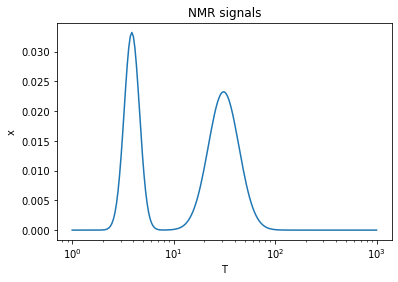

In [6]:
plt.xscale("log")
plt.plot(T_samp,x)
plt.title("NMR signals")
plt.xlabel("T")
plt.ylabel("x")

## Q4

In [7]:
M = 50 
tmin = 0
tmax = 1.5

t = [tmin +(m-1)*(tmax-tmin)/(M-1) for m in range(1, M+1)]

## Q5 

In [8]:
K = np.zeros((M,N))

for m in range(M):
    for n in range(N):
        K[m,n] = np.exp(- t[m]*T_samp[n])

## Q6 

In [9]:
z = K @ np.array(x) 
sigma = 0.01*z[0]
w = np.random.normal(loc=0.0, scale= sigma, size=M)

## Q7

Text(0, 0.5, 'y = Kx + w')

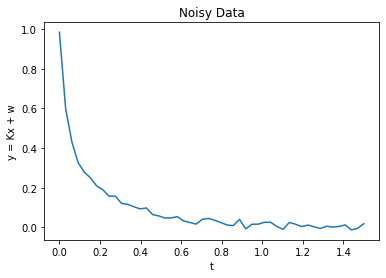

In [10]:
y = z+w

#plotting y in function of t 

plt.plot(t,y)
plt.title("Noisy Data")
plt.xlabel("t")
plt.ylabel("y = Kx + w")

# 3 Comparison of regularization strategies

## Q1 

The function $h:x \mapsto \frac{1}{2}||Kx-y||^2 + \beta g(x)$ is convex because $||.||$ and $g$ are convex and $K. -y$ is linear. 

We compute the gradient and then the hessian of the following function.
$\nabla (||K.-y||) (x)= K^T (Kx -y)$ and $\nabla^2 (||K.-y||) (x)= K^TK $.

We notice that $\nabla^2 (||K.-y||) (x)\geq 0$


1)**Smothness prior** 
$g(x) = \frac{1}{2}||D(x)||^2$
Let's coompute the gradient and then the hessian.
$\nabla_x g(x)= \nabla \left[ \sum_{n=1}^N (x^{(n)}-x^{(n-1)})^2 \right] $


We get $\nabla_x g(x) = C x $ where $C(i,i)= 2$ and $C(i+1,i)=C(i-1,i)=-1$ for all i, with the circular convention.

The hessian is $\nabla^2 g(x) = C$. We notice that $C = D^T D $ with $D = I - E$ where E has -1 on the upper off diagonal and -1 on bottom left corner.

We will show that $K^TK + \beta D^T D $ is definite positive. By consruction it is positive. Let's proove that if $X^T(K^TK + D^T D )X =0$ then $X=0$.

We suppose that  $X^T(K^TK + \beta D^T D )X =0$

This means $||KX||^2+  \beta ||DX||^2 =0$, this is done if and only if $X \in \ker K \cap \ker D $

$DX = 0 \Leftrightarrow X = EX \Leftrightarrow x_i = x_{i+1}$.

This implies that $X = x_1 (1,\dots,1)$. $KX = 0 $ implies $ \sum_m(\exp(−T(n)t(m)))\times x_1=0$ 
The sum can't be 0 because it is only strictly positive numbers. Then we must have $x_1=0$.

X=0.

**$K^TK + D^T D $ is definite positive.**

The solution is unique.



2)$~~~~~ \iota$ imposes that we have to find a solution in $[x_{min}, x_{max}]^N$.
Beacuse outside of this region, this function to minimize is equal to $\infty$, so it is the same as minimizing the function with as constraint that $x$ is in this region. 

In this region we have to minimise $|\!|K.-y|\!|^2 + |\!|D.|\!|^2$. We have shown in 1) that this function is strictly convex. 

It is stricly convex and the search interval is convex and bounded, there is a unique solution to this problem.


3)**Sparsity prior**
$g(x)=|\!|x|\!|_1$ is a norm, so it is convex. We can use the triangular inequality to show it.
$g$ is coercive because there exists C such that $||x||_1\geq C ||x||_2$ (equivalence of norms), by making the norm $||x||_2 \rightarrow + \infty$ 
As the function is coercive and continous, it has a minimalizer. But we can't say anything about unicity.




## Q2

1) No specific algorithm, the function to minimize is minimum for $\nabla f = 0$. This means $(K^TK + \beta D^T D )X -K^T y=0$, we find $X$ by computing $X  = (K^TK + \beta D^T D )^{-1} K^T y $

2) F ν-Lipschitzian gradient with ν the largest eigenvalue of K>K +βD>D since :
$C = [x_{min}, x_{max}]^n$ is convex. 
$\forall x,y ∈ C ||∇F(x)− ∇F(y)|| = ||(K^TK +βD^TD)(x −y)|| ≤ ν||x −y||.$

C is closed with the set of minimizers on C is non empty

We will use the Projected Gradient Algorithm

3) We have that $f=||K.-y||$ is differentiable and belongs to $\Gamma^0(\mathbb{R})$, but $g$ is not differentiable and belongs to $\Gamma^0(\mathbb{R})$. We will use Forward-Backward Algorithm. f is differentiable and has a Lipschitzian gradient with as constant $\max SVD(K)$ (this if finite, and a positive number).

We use the Forward-Backward algorithm.

## Q3

In [11]:
#we define beta
beta = 1

In [12]:
#We define D
D = np.eye(N) -np.roll(np.eye(N), 1, axis=0)


In [13]:
#1) beta_opt1 = 0.2828282828282829
beta = 0.2828282828282829
def inverse(beta):
    return np.linalg.inv(K.T @ K + beta* D.T @ D) @ (K.T @ y)

X_sol = inverse(beta)


Text(0, 0.5, 'x with smoothness prior')

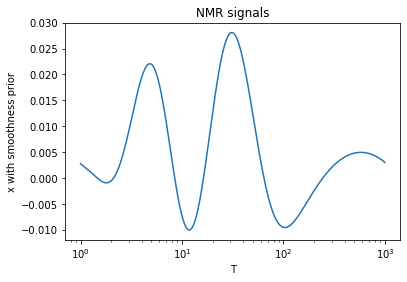

In [14]:
plt.xscale("log")
plt.plot(T_samp,X_sol)
plt.title("NMR signals")
plt.xlabel("T")
plt.ylabel("x with smoothness prior")

In [15]:
#2) betaopt2 = 0.0
xmin = np.min(x)
xmax = np.max(x)
mu  = np.linalg.eigh(K.T @ K + beta* D.T @ D)[0][-1]

In [16]:
beta =0
f = lambda x : np.linalg.norm(K@x - y) 
g = lambda x : beta *0.5* np.linalg.norm(D@x)

def projection_C(y):
    N = y.shape[0]
    pc_y = np.zeros(N)
    for it in range(N):
        pc_y[it] = min(max(xmin,y[it]),xmax)
    return pc_y
        
        
def ProjectedGradientAlgorithm(k,beta):
    xk,yk, xk1,yk1 = np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N) #we define x_k, y_k, x_(k+1) and y_(k+1)
    gamma = 1/mu
    lamda = 1.5/2
    
    for iteration in range(k):
        
        yk1 = xk -gamma*((K.T @ K) @xk -K.T @y +beta*D.T@D@xk)
        xk1 = xk +lamda*(projection_C(yk) - xk )
        
        xk, yk = np.copy(xk1), np.copy(yk1)
        
    
    return xk
Xsol2 = ProjectedGradientAlgorithm(10000,beta)

Text(0, 0.5, 'x with smoothness prior')

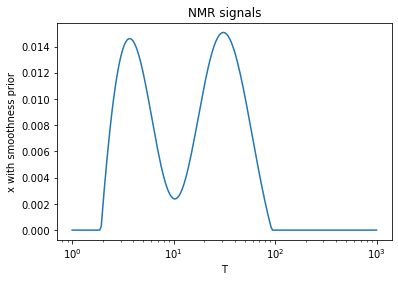

In [17]:
plt.xscale("log")
plt.plot(T_samp,Xsol2)
plt.title("NMR signals")
plt.xlabel("T")
plt.ylabel("x with smoothness prior")

In [18]:
#3)beta_opt3 = 0.10101010101010102

beta = 0.10101010101010102
def proximal_norm1(v,gamma,beta):
    prox = np.zeros(v.shape[0])
    
    for i in range(v.shape[0]):
        sign = 2*float (v[i]>0) - 1
        prox[i] = sign *max(0, abs(v[i])- gamma*beta)
        
    return prox
    
def ForwardBackward(k,beta):
    
    xk,yk, xk1,yk1 = np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N) #we define x_k, y_k, x_(k+1) and y_(k+1)
    gamma = 1/mu
    lamda = 1.5/2
    
    for iteration in range(k):
        
        yk1 = xk -gamma*K.T@(K @xk -y) 
        xk1 = xk +lamda*(proximal_norm1(yk,gamma,beta) - xk )
        
        xk, yk = np.copy(xk1), np.copy(yk1)
        
    
    return xk
    
Xsol3 = ForwardBackward(10000,beta)
    
    

Text(0, 0.5, 'x with smoothness prior')

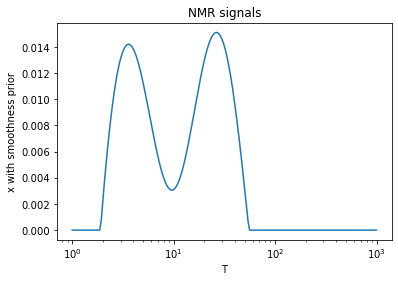

In [19]:
plt.xscale("log")
plt.plot(T_samp,Xsol3)
plt.title("NMR signals")
plt.xlabel("T")
plt.ylabel("x with smoothness prior")

## Q4

In [20]:
def normalized_quadratic_error(xhat,xbar):
    return (np.linalg.norm(xhat - xbar)/np.linalg.norm(xbar))**2

In [21]:
#1)
print("The normalized quadratic error for 1) is ", normalized_quadratic_error(X_sol,x))

The normalized quadratic error for 1) is  0.4145167047681945


In [22]:
#2)
print("The normalized quadratic error for 2) is ", normalized_quadratic_error(Xsol2,x))

The normalized quadratic error for 2) is  0.21565787449699622


In [23]:
#3)
print("The normalized quadratic error for 3) is ", normalized_quadratic_error(Xsol3,x))

The normalized quadratic error for 3) is  0.26463864191604336


## Q5

In [63]:
beta_Opt1 = min ( np.linspace(0,1,100) , key = lambda b : normalized_quadratic_error(inverse(b),x) )
beta_Opt2 = min ( np.linspace(0,1,100) , key = lambda b : normalized_quadratic_error(ProjectedGradientAlgorithm(10000,b),x) )
beta_Opt3 = min ( np.linspace(0,1,100) , key = lambda b : normalized_quadratic_error(ForwardBackward(10000,b),x) )


# Part II

## 1 Maximum entropy regularization 

### Q1 

ent is proper as there exist $x$ such that $\text{ent}(x) < +\infty$. ent is differentiable on $\mathbb{R}^*_+$ but not on $\mathbb{R}^-$. It is lower-semicontinous.  ent is strictly convex.

### Q2 

As the function ent is strictly convex and $||K.-y||$ is convex, the sum of a convex function and a strictly convex function is stricly convex. The problem admits only one solution. 

### Q3 

The proximal of ent is:

$$\text{prox}_{\gamma \beta ent}(v)=(p_n) \text{  with  } p_n = \gamma \beta W(\exp\left(\frac{v_n}{\gamma \beta} -1 - \ln(\gamma \beta))\right)$$

### Q4 

In [49]:
from scipy.special import lambertw

def lambert_o_exp(z):
    """ fonction calculant Lambert o exponentielle, issue du drive LSO """
    if z > 100:
        return z - np.log(z)        
    if z < -20 :
        return 0
    w = 1
    v = np.float64("inf")
    x = np.exp(z)
    while np.abs(w-v)/np.abs(w)>1e-8:
        v = w
        e = np.exp(w)
        f = w*e - x 
        w = w - f/((e*(w+1) - (w+2)*f/(2*w+2)))
    return w



In [50]:
def prox_ent(v,gamma,beta):
    
    p = np.zeros(v.shape[0]) 
    
    for i in range(v.shape[0]):
        p[n]= gamma*beta* lambert_o_exp( (v[n]/(gamma*beta) - 1 -np.log(gamma*beta)) )
        if p[n].imag > p[n].real:
            print("boum")
        p[n] = p[n].real
    
    return np.array(p)

In [51]:
def douglas_rachford_algo(k,beta):
    s = np.zeros(N)
    t = np.zeros(N)
    u = np.zeros(N)
    lamda = 1
    gamma = 1/mu
    
    for it in range(k):
        t = prox_ent(s, gamma, beta)
        u = np.linalg.inv(gamma *K.T @K +np.eye(N)) @ (gamma*(K.T@y) +2*t -s)
        s = s + lamda*(u - t)
        
        lamda = 1/(it+2)
    
    return s

In [52]:
Xsol4 = douglas_rachford_algo(10000,0.0001)

Text(0, 0.5, 'x')

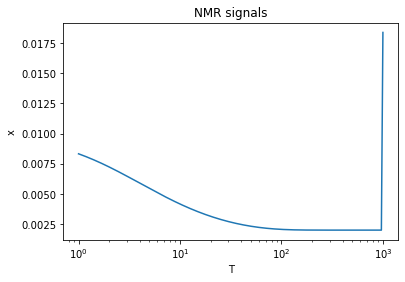

In [53]:
plt.xscale("log")
plt.plot(T_samp,Xsol4)
plt.title("NMR signals")
plt.xlabel("T")
plt.ylabel("x")

In [54]:
print("The normalized quadratic error for the Rachford is ", normalized_quadratic_error(Xsol4,x))

The normalized quadratic error for the Rachford is  0.7832050753464888


In [55]:
def ForwardBackward_ent(k,beta):
    
    xk,yk, xk1,yk1 = np.zeros(N),np.zeros(N),np.zeros(N),np.zeros(N) #we define x_k, y_k, x_(k+1) and y_(k+1)
    gamma = 1/mu
    lamda = 1.5/2
    
    for iteration in range(k):
        
        yk1 = xk -gamma*K.T@(K @xk -y) 
        xk1 = xk +lamda*( prox_ent(yk,gamma,beta) - xk )
        
        xk, yk = np.copy(xk1), np.copy(yk1)
        
    
    return xk

In [56]:
Xsol5 = ForwardBackward_ent(10000,0.0001)

Text(0, 0.5, 'x')

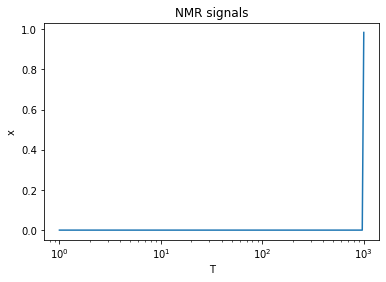

In [57]:
plt.xscale("log")
plt.plot(T_samp,Xsol5)
plt.title("NMR signals")
plt.xlabel("T")
plt.ylabel("x")

## Q7

## Q8